Item A:

/tmp/ipython-input-1789022719.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  plt.scatter(x, y_x, vmin = -1, vmax = 1)


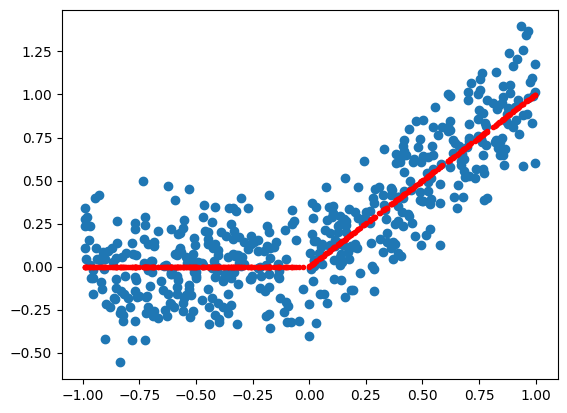

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#armo las 500 muestras de la uniforme

x = np.random.uniform(-1, 1, 500)

#defino las muestras de la Relu
r_x = x * (x > 0)

# Genero la normal siguiendo la relu
y_x = np.random.normal(r_x , np.sqrt(0.04), 500);


#grafico

plt.scatter(x, y_x, vmin = -1, vmax = 1)
plt.plot(x , r_x ,'r.')
plt.show()



**Punto B**


**Item 1**

**Esperanza de x:**

$$
E[X] = \frac{a+b}{2} = 0
$$


---
**Varianza x:**

$$
Var(X) = \frac{(b-a)^2}{12} = \frac{1}{3}
$$

---

**Esperanza de Y:**

$$
E[Y] = E\big[E[Y \mid X=x]\big]
$$

Como \(Y|X\) es normal:

$$
E[Y] = E[r(x)]
$$

Siguiendo la propiedad:

$$
E[g(X) \mid X \in A]
= \frac{E\big[g(X)\,\mathbf{1}{\{X \in A\}}\big]}{P(X \in A)}
$$

se despeja:

$$
E\big[g(X)\,\mathbf{1}{\{X \in A\}}\big]
= E[g(X) \mid X \in A] \cdot P(X \in A)
$$

Aplicando al caso particular:

$$
E\big[x \,\mathbf{1}_{\{x > 0\}}\big]
= E[x \mid x > 0]\cdot P(x > 0)
= \tfrac{1}{2}\cdot \tfrac{1}{2}
= \tfrac{1}{4}
$$

---

**Varianza de Y:**

$$
Var(Y) = E\big[Var(Y \mid X)\big]
+ Var\big(E[Y \mid X]\big)
$$

Donde:

$$
E[Var(Y \mid X)] = 0.04
$$

ya que Y_x es normal, y además:

$$
E[Y \mid X] = r(x)
$$

Por lo tanto:

$$
Var(E[Y \mid X])
= Var(r(x))
= E[r(x)^2] - (E[r(x)])^2
= \tfrac{1}{6} - \Big(\tfrac{1}{4}\Big)^2
= \tfrac{5}{48}
$$


$$
Var(Y) = \frac{5}{48} + 0.04 = 0.14442
$$


---
**Cálculo de E[XY]**

Usamos:
$$
E[XY] \;=\; E\!\left[\,E[XY\mid X]\,\right]
\;=\; E\!\left[\,X\,E[Y\mid X]\,\right].
$$

Como $Y\mid X=x \sim \mathcal N(r(x),\sigma^2)$ y $E[Y\mid X]=r(X)$, resulta:
$$
E[XY] \;=\; E\!\left[X\,r(X)\right].
$$

Con $r(X)=X\,\mathbf{1}{\{X>0\}}$ , entonces:
$$
X\,r(X) \;=\; X^2\,\mathbf{1}{\{X>0\}}.
$$

Sea $A=\{X>0\}$. Por descomposición por eventos:
$$
E[X^2\,\mathbf{1}{{A}}] \;=\; E[X^2\mid A]\;P(A).
$$

Para $X\sim U(-1,1): P(A)=\tfrac12$ y $X\mid A \sim U(0,1)$, luego
$$
E[X^2\mid A] \;=\; \frac{1}{3}.
$$

Por lo tanto:
$$
E[XY] \;=\; E[X\,r(X)]
\;=\; E[X^2\,\mathbf{1}{\{X>0\}}]
\;=\; \frac{1}{3}\cdot \frac{1}{2}
\;=\; \frac{1}{6}.
$$





**Item 2**:

El regresor óptimo se define como la función que minimiza el riesgo esperado bajo el error cuadrático medio (MSE).

Partimos del riesgo esperado:
$$
R(\varphi)\;=\; \mathbb{E}\big[(Y-\varphi(X))^2\big].
$$

Aplicamos descomposición condicional para cada valor fijo \(X=x\):
$$
\mathbb{E}\!\big[(Y-\varphi(x))^2 \mid X=x\big]
=\operatorname{Var}(Y\mid X=x)+\big(\mathbb{E}[Y\mid X=x]-\varphi(x)\big)^2.
$$

Ahora tomamos esperanza respecto de \(X\):
$$
\mathbb{E}\big[(Y-\varphi(X))^2\big]
=\mathbb{E}\!\big[\operatorname{Var}(Y\mid X)\big]
+\mathbb{E}\!\big[\big(\mathbb{E}[Y\mid X]-\varphi(X)\big)^2\big].
$$


Por lo tanto,
$$
\mathbb{E}\big[(Y-\varphi(X))^2\big]\;\ge\;\mathbb{E}\!\big[\operatorname{Var}(Y\mid X)\big],
$$
y la igualdad se alcanza si y solo si
$$
\boxed{\ \varphi(X)=\mathbb{E}[Y\mid X]}
$$

Por lo que es el estimador optimo y el error bayesiano asociado es:

$$
E[Var(Y|X)]
$$

**Item 3**:


**Mejor predictor sin observar \(X\)**

Si no observamos \(X\) y queremos minimizar el MSE al predecir \(Y\) con una constante \(c\), buscamos  
$$
c^\ast = \arg\min_{c\in\mathbb{R}} \mathbb{E}\big[(Y-c)^2\big].
$$
Usando la descomposición  
$$
\mathbb{E}[(Y-c)^2]=\operatorname{Var}(Y)+(\mathbb{E}[Y]-c)^2,
$$
vemos que el mínimo se obtiene para $c=\mathbb{E}[Y]$. Por lo tanto, el mejor predictor resulta:
$$
  \hat{Y}= \mathbb{E}[Y] = \frac{1}{4}.
$$

El error que comete este predictor (MSE) es  
$$
\mathbb{E}\big[(Y-\mathbb{E}[Y])^2\big]=\operatorname{Var}(Y) = \frac{5}{48}.
$$

---

**Comparación con el regresor óptimo (condicional)**

- El **regresor óptimo** $\varphi^*(X)=\mathbb{E}[Y\mid X]$ alcanza el **error bayesiano**
  $$
  R_{\text{opt}}=\mathbb{E}\big[\operatorname{Var}(Y\mid X)\big] =0.04
  $$
- El predictor **sin \(X\)** tiene error
  $$
  R_{\text{no-}X}=\operatorname{Var}(Y) = 0.1442
  $$

La diferencia (exceso de error por no usar \(X\)) es  
$$
R_{\text{no-}X}-R_{\text{opt}}
=\operatorname{Var}(Y)-\mathbb{E}[\operatorname{Var}(Y\mid X)]
=\operatorname{Var}\big(\mathbb{E}[Y\mid X]\big) = 0.1042
$$

Se puede interpretar como que el no observar x te hace pagar exactamente la varianza de la esperanza condicional, debido a que perdes la estructura de la señal.


**Punto C** :


**Regresion Lineal** :


La regresión lineal busca encontrar una función que aproxime la relación entre las variables de entrada $X$ y la salida $Y$, minimizando el error cuadrático medio entre los valores reales y los predichos.

Para evitar problemas de sobreajuste, se elige un modelo de **baja complejidad**, restringiendo el espacio de hipótesis a funciones lineales de la forma:

$$\hat{Y} = w^T X + b$$

donde $w$ son los coeficientes (pendientes) y $b$ es el término independiente.

El criterio de entrenamiento se basa en **minimizar el riesgo empírico**:

$$ (w, b) = \arg \min_{w,b} \sum_{i=1}^n (w^T X_i + b - Y_i)^2 $$

Este problema tiene solución cerrada, conocida como la **ecuación normal**:

$$ w = (X^T X)^{-1} X^T y $$

De esta forma se obtiene la recta de regresión que mejor aproxima los datos observados.


In [2]:
class regLineal:
  def __init__(self):
    self.params = None;

    # Entrenamiento
  def fit(self, X, y):
    # Agregar columna de unos para la constante de ajuste Y = wx + b
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X])  #(1 x1)
                                                       #(1 x2)
    # Fórmula matricial de mínimos cuadrados
    self.params = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y # w = (x * xt)^-1 * xt * y

  #funcion de prediccion
  def predict(self, X):
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
    return X_bias @ self.params


  def err_predict(self , y_pred ,y):
    #y_pred = self.predict(x)
    err = y - y_pred
    return np.mean(err**2)

 # Gradiente descendente
  def fit_gradient(self, X, y, learning_rate, n_iter):
        N, d = X.shape
        # Inicializar parámetros
        self.params = np.zeros(d + 1)  # [b, w1, ..., wd]

        w_s = []

        for _ in range(n_iter):

            # Predicción
            y_pred = self.predict(X)
            # Residuales
            error = y - y_pred
            # Gradiente para b
            grad_b = -2 * np.mean(error)
            # Gradiente para w
            grad_w = -2 * (X.T @ error) / N
            # Actualización de parámetros
            self.params[1] -= learning_rate * grad_w
            self.params[0] -= learning_rate * grad_b
            w_s.append(self.params[1])

        return w_s





w_lineal : 0.511571672888365
b_lineal : 0.2585063909047761
Error de entrenamiento: 0.058642769723391774
Predicción para irradiancia de 0.5: 0.5142922273489586


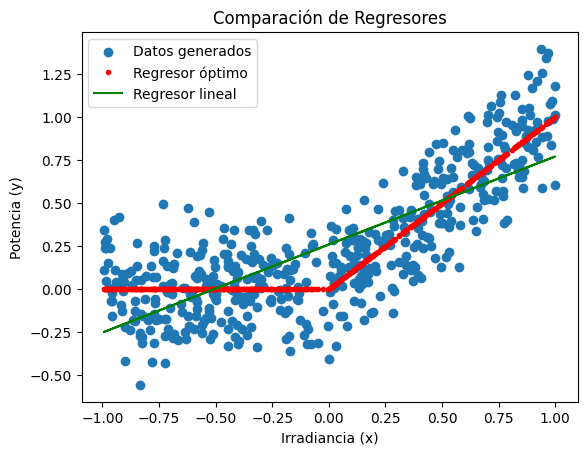

In [3]:
#modifico x para que tenga el formato correcto
x_reshape = x.reshape(-1, 1) #transformo las muestras a una matriz columna (500, 1)

# Entrenar la regresión lineal
reg_lineal = regLineal()
reg_lineal.fit(x_reshape, y_x)

#parametros resultantes de la estimacion:
print(f"w_lineal : {reg_lineal.params[1]}")
print(f"b_lineal : {reg_lineal.params[0]}")


# Calcular el error de entrenamiento
y_pred_train = reg_lineal.predict(x_reshape) #hago la prediccion de y con los mismos datos
error_entrenamiento = reg_lineal.err_predict(y_pred_train , y_x) #hago la resta de los errores
print(f"Error de entrenamiento: {error_entrenamiento}")

# Predecir para una irradiancia de 0.5
irradiancia_pred = np.array([[0.5]])
prediccion = reg_lineal.predict(irradiancia_pred)
print(f"Predicción para irradiancia de 0.5: {prediccion[0]}")

# Graficar el regresor obtenido superpuesto al óptimo y al scatter
plt.scatter(x, y_x, label='Datos generados')
plt.plot(x, r_x, 'r.', label='Regresor óptimo')
plt.plot(x, y_pred_train, 'g-', label='Regresor lineal')
plt.xlabel('Irradiancia (x)')
plt.ylabel('Potencia (y)')
plt.title('Comparación de Regresores')
plt.legend()
plt.show()

**Punto D**:


**Gradiente descendente**


A diferencia de la solución matricial cerrada, el gradiente descendente es un método iterativo que ajusta los parámetros paso a paso en la dirección que reduce el error cuadrático medio (MSE).  
El esquema de actualización es:

$$
\theta_{t+1} = \theta_t - \alpha \, \nabla J(\theta_t)
$$

donde:
- $\theta = (b,w)$ son los parámetros del modelo,
- $\alpha$ es la tasa de aprendizaje (*learning rate*),
- $J(\theta)$ es la función de costo (MSE).

En este caso, la variable de interés es la **pendiente $w$**, que comienza en cero y se va actualizando gradualmente a medida que el algoritmo "aprende" de los datos.  




w_gradiente : 0.5115704540007803
b_gradiente : 0.25850634778091625
Error de entrenamiento con gradiente: 0.05864276972388698
Predicción para irradiancia de 0.5: 0.5142915747813064


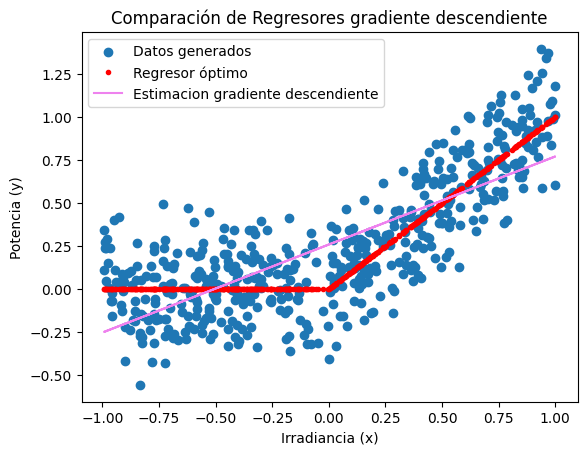

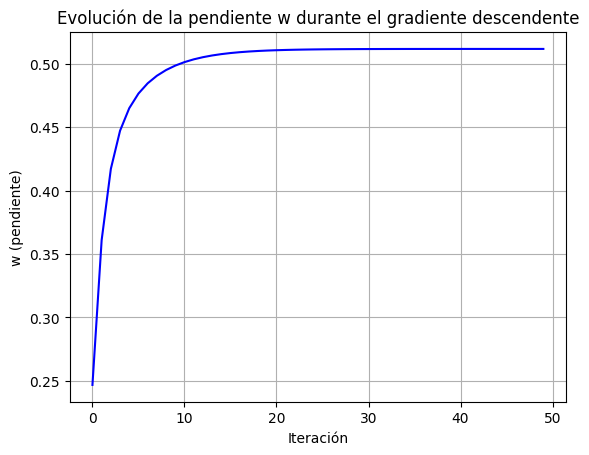

In [4]:

w_s = reg_lineal.fit_gradient(x_reshape, y_x, 0.3, 50) #aplico el gradiente y guardo los w


#mostramos parametros resultantes
print(f"w_gradiente : {reg_lineal.params[1]}")
print(f"b_gradiente : {reg_lineal.params[0]}")
y_gradiente = reg_lineal.predict(x_reshape) #hago la prediccion


error_gradiente = reg_lineal.err_predict(y_gradiente, y_x) #hallo el error asociado
print(f"Error de entrenamiento con gradiente: {error_gradiente}")

# Predecir para una irradiancia de 0.5  con el metodo del gradiente
irradiancia_pred = np.array([[0.5]])
prediccion = reg_lineal.predict(irradiancia_pred)
print(f"Predicción para irradiancia de 0.5: {prediccion[0]}")


# Graficar el regresor obtenido superpuesto al óptimo y al scatter
plt.scatter(x, y_x, label='Datos generados')
plt.plot(x, r_x, 'r.', label='Regresor óptimo')
plt.plot(x, y_gradiente, 'violet', label='Estimacion gradiente descendiente')
plt.xlabel('Irradiancia (x)')
plt.ylabel('Potencia (y)')
plt.title('Comparación de Regresores gradiente descendiente')
plt.legend()
plt.show()


#grafico de w en funcion de las iteraciones
plt.plot(w_s, 'b-')
plt.xlabel("Iteración")
plt.ylabel("w (pendiente)")
plt.title("Evolución de la pendiente w durante el gradiente descendente")
plt.grid()
plt.show()

**Evolucion de W**


El gráfico muestra cómo $w$ crece rápidamente en las primeras iteraciones y luego se estabiliza alrededor de un valor cercano al óptimo.  
Al principio los pasos son grandes porque la pendiente del error es pronunciada, a medida que el modelo se acerca al mínimo, las actualizaciones se hacen cada vez más pequeñas y $w$ se estabiliza hasta llegar al valor que mejor ajusta los datos.

En resumen, la evolución de $w$ refleja cómo el gradiente descendente ajusta progresivamente la recta de regresión hasta alcanzar el valor que minimiza el error.